In [9]:
!pip3 install tweet-preprocessor

In [10]:
import tweepy
from textblob import TextBlob
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
from tweepy import Stream
from tweepy import OAuthHandler
from tweepy.streaming import StreamListener
import json
import pandas as pd
import csv
import re #regular expression
import string
import preprocessor as p


In [11]:
 #how to connect to Twitter Streaming API
 #Import the necessary methods from tweepy library
from tweepy.streaming import StreamListener
from tweepy import OAuthHandler
from tweepy import Stream

#Variables that contains the user credentials to access Twitter API 
access_token = "3266876664-pJ7CBhErVOmW9FA1Uz4GHzOnBOhxjbO3ngqaOu9"
access_token_secret = "PAePFkpkE0KCgZBVXKKzngG6Vv7IHMlv6Zke7zpi9E6WT"
consumer_key = "pygQQl4CkWaGl6ToxMlU1EmG1"
consumer_secret = "oKLBxJb7ZTybdZj9DEj6Jz4kNhu2URqtYQ11W0ISLjV7FnyG47"

In [12]:
#pass twitter credentials to tweepy
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth)

In [13]:
#This is a basic listener that just prints received tweets to stdout.
#Create the class that will handle the tweet stream.
# Create tracklist with the words that will be searched for
#tracklist = ['bitcoin','etherium','digital currency']
# Initialize Global variable
tweet_count = 0
# Input number of tweets to be downloaded
n_tweets = 500
class StdOutListener(StreamListener):

  def on_data(self, data):

      global tweet_count
      global n_tweets
      global stream
      if tweet_count <n_tweets:
        print(data)
      
        File=open('twitter_Data.csv','a')
        File.write(data)
        File.write('\n')
        File.close()
        tweet_count+=1
        return True
      else:
        stream.disconnect()
 
  def on_error(self, status):
        print(status)


if __name__ == '__main__':

    #This handles Twitter authetification and the connection to Twitter Streaming API
    l = StdOutListener()
    auth = OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    stream = Stream(auth, l)

    #This line filter Twitter Streams to capture data by the keywords: 'python', 'javascript', 'ruby'
    stream.filter(track=['bitcoin','etherium','digital currency'])


{"created_at":"Sat Jul 04 16:54:48 +0000 2020","id":1279458652680683521,"id_str":"1279458652680683521","text":"RT @AdeardianM: If you consider yourself a bitcoiner, but don't own bitcoin in your retirement account yet. you're leaving sats on the tabl\u2026","source":"\u003ca href=\"http:\/\/twitter.com\/download\/android\" rel=\"nofollow\"\u003eTwitter for Android\u003c\/a\u003e","truncated":false,"in_reply_to_status_id":null,"in_reply_to_status_id_str":null,"in_reply_to_user_id":null,"in_reply_to_user_id_str":null,"in_reply_to_screen_name":null,"user":{"id":330292935,"id_str":"330292935","name":"Mike India","screen_name":"Z4kw4n","location":"Indonesia","url":null,"description":"Nimiq: NQ75 896G 3KHR 5VP9 UYS3 JLDM 8NHE 1C2X D9LV\nHandCash: $mikeindia\nEOS: mikeindia212\nqtumbadger4.crypto\nFIO: mikeindia@qtum","translator_type":"none","protected":false,"verified":false,"followers_count":1049,"friends_count":1717,"listed_count":1,"favourites_count":23859,"statuses_count":22362,"created

In [23]:
import json
import pandas as pd
import matplotlib.pyplot as plt
tweets_data_path = 'twitter_Data.csv'
tweets_data = []
tweets_file = open(tweets_data_path, "r")
for line in tweets_file:
    try:
        tweet = json.loads(line)
        tweets_data.append(tweet)
    except:
        continue
tweets = pd.DataFrame()
tweets['Username'] = list(map(lambda tweet: tweet['user']['screen_name'], tweets_data))
tweets['Timestamp'] = list(map(lambda tweet: tweet['created_at'], tweets_data))
tweets['text'] = list(map(lambda tweet: tweet['text'], tweets_data))
tweets.head(10)
#tweets['text'].head(10)

,Username,Timestamp,text
0,venkatz8,Sat Jul 04 16:49:37 +0000 2020,"RT @Goosebet_io: Day 3 on #Goosebet Payed $84,..."
1,cryptohanz_07,Sat Jul 04 16:49:37 +0000 2020,"RT @Goosebet_io: Day 3 on #Goosebet Payed $84,..."
2,SimpleProwess,Sat Jul 04 16:49:39 +0000 2020,RT @hirakazumain: $100 Giveaway (Bitcoin)\n\n-...
3,News_1jl4,Sat Jul 04 16:49:41 +0000 2020,Former Phillies pitcher Tyson Brummett killed ...
4,Z4kw4n,Sat Jul 04 16:54:48 +0000 2020,RT @AdeardianM: If you consider yourself a bit...
5,Leducgagnetommy,Sat Jul 04 16:54:50 +0000 2020,RT @CryptoTownEU: 🚀 Airdrop: Sirot Token\n💰 Va...
6,MoonblastDolly,Sat Jul 04 16:54:50 +0000 2020,Will pop figures be the new bitcoin
7,Baka_Destroyer,Sat Jul 04 16:54:50 +0000 2020,#Bitcoin haha money from korea haha coronavirus
8,Wesley53055771,Sat Jul 04 16:54:50 +0000 2020,Bitcoin: The beauty of mathematics https://t.c...
9,Besboosa84,Sat Jul 04 16:54:51 +0000 2020,@zack81607214 Sign up and get $1 sent to your ...


In [24]:
#Clean the text
def cleantxt(text):
   text=re.sub(r'@[A-Za-z0-9]+','',text) #removed mentions
   text=re.sub(r'#','',text) #Removing the '#' symbol
   text=re.sub(r'RT[\s]+','',text)#Removing RT(Retweets)
   text=re.sub(r'https?:\/\/\S+','',text)#remove the hyper link
   text=re.sub(r'[0-9]+','',text)
   text=re.sub(r'$','',text)
   text=re.sub(r'\n','',text)
  
   text=re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+','',text)
   return text
#Cleaning the text
tweets['text']=tweets['text'].apply(cleantxt)
#Show the  Cleaned tweets
#tweets.head(20)
tweets['text'].head(2)

0    _io: Day  on Goosebet Payed $, USD In Divs💵Tha...
1    _io: Day  on Goosebet Payed $, USD In Divs💵Tha...
Name: text, dtype: object

In [25]:
import bs4 as bs
from bs4 import BeautifulSoup
tweets['text']= [BeautifulSoup(content).get_text() for content in tweets['text']]
x=tweets['text']
x.head(20)

0     _io: Day  on Goosebet Payed $, USD In Divs💵Tha...
1     _io: Day  on Goosebet Payed $, USD In Divs💵Tha...
2     : $ Giveaway (Bitcoin)-Retweet -Follow  x  -Ta...
3     Former Phillies pitcher Tyson Brummett killed ...
4     : If you consider yourself a bitcoiner, but do...
5     : 🚀 Airdrop: Sirot Token💰 Value: $ .👥 Referral...
6                   Will pop figures be the new bitcoin
7        Bitcoin haha money from korea haha coronavirus
8     Bitcoin: The beauty of mathematics  via  ........
9     Sign up and get $ sent to your Bitcoin wallet:...
10    : GIVEAWAY💴   $CRO to random followers that:👍 ...
11    : Bitcoin is the only property you can truly own.
12    Aprovecha gran oportunidad para ganar  Bitcoin...
13    : Join this free satoshi giveaway 🔥🔥🔥Sign up f...
14    _io: Day  on Goosebet Payed $, USD In Divs💵Tha...
15    Current block height is . blocks have passed s...
16    : $ giveaway! (PayPal or BTC  )📌Follow  & myse...
17    : 🚨💰Bitcoin Crypto Giveaway💰🚨🎁WINNER GETS 

In [26]:
import re
my_list = {
  "ain't": "am not",
  "aren't": "are not",
  "can't": "cannot",
  "can't've": "cannot have",
  "'cause": "because",
  "could've": "could have",
  "couldn't": "could not",
  "couldn't've": "could not have",
  "didn't": "did not",
  "doesn't": "does not",
  "don't": "do not",
  "hadn't": "had not",
  "hadn't've": "had not have",
  "hasn't": "has not",
  "haven't": "have not",
  "he'd": "he would",
  "he'd've": "he would have",
  "he'll": "he will",
  "he'll've": "he will have",
  "he's": "he is",
  "how'd": "how did",
  "how'd'y": "how do you",
  "how'll": "how will",
  "how's": "how is",
  "I'd": "I would",
  "I'd've": "I would have",
  "I'll": "I will",
  "I'll've": "I will have",
  "I'm": "I am",
  "I've": "I have",
  "isn't": "is not",
  "it'd": "it had",
  "it'd've": "it would have",
  "it'll": "it will",
  "it'll've": "it will have",
  "it's": "it is",
  "let's": "let us",
  "ma'am": "madam",
  "mayn't": "may not",
  "might've": "might have",
  "mightn't": "might not",
  "mightn't've": "might not have",
  "must've": "must have",
  "mustn't": "must not",
  "mustn't've": "must not have",
  "needn't": "need not",
  "needn't've": "need not have",
  "o'clock": "of the clock",
  "oughtn't": "ought not",
  "oughtn't've": "ought not have",
  "shan't": "shall not",
  "sha'n't": "shall not",
  "shan't've": "shall not have",
  "she'd": "she would",
  "she'd've": "she would have",
  "she'll": "she will",
  "she'll've": "she will have",
  "she's": "she is",
  "should've": "should have",
  "shouldn't": "should not",
  "shouldn't've": "should not have",
  "so've": "so have",
  "so's": "so is",
  "that'd": "that would",
  "that'd've": "that would have",
  "that's": "that is",
  "there'd": "there had",
  "there'd've": "there would have",
  "there's": "there is",
  "they'd": "they would",
  "they'd've": "they would have",
  "they'll": "they will",
  "they'll've": "they will have",
  "they're": "they are",
  "they've": "they have",
  "to've": "to have",
  "wasn't": "was not",
  "we'd": "we had",
  "we'd've": "we would have",
  "we'll": "we will",
  "we'll've": "we will have",
  "we're": "we are",
  "we've": "we have",
  "weren't": "were not",
  "what'll": "what will",
  "what'll've": "what will have",
  "what're": "what are",
  "what's": "what is",
  "what've": "what have",
  "when's": "when is",
  "when've": "when have",
  "where'd": "where did",
  "where's": "where is",
  "where've": "where have",
  "who'll": "who will",
  "who'll've": "who will have",
  "who's": "who is",
  "who've": "who have",
  "why's": "why is",
  "why've": "why have",
  "will've": "will have",
  "won't": "will not",
  "won't've": "will not have",
  "would've": "would have",
  "wouldn't": "would not",
  "wouldn't've": "would not have",
  "y'all": "you all",
  "y'alls": "you alls",
  "y'all'd": "you all would",
  "y'all'd've": "you all would have",
  "y'all're": "you all are",
  "y'all've": "you all have",
  "you'd": "you had",
  "you'd've": "you would have",
  "you'll": "you you will",
  "you'll've": "you you will have",
  "you're": "you are",
  "you've": "you have"
}

c_re = re.compile('(%s)' % '|'.join(my_list.keys()))

def expandContractions(text, c_re=c_re):
    def replace(match):
        return my_list[match.group(0)]
    return c_re.sub(replace, text)


tweets['text']=tweets['text'].apply(expandContractions)

#Remove punctuation
import string
def remove_punctuations(text):
   no_punct="".join([c for c in text if c not in string.punctuation])
   return no_punct

tweets['text']=tweets['text'].apply(lambda x:remove_punctuations(x))
x=tweets['text']
x.head(10)

0    io Day  on Goosebet Payed  USD In Divs💵Thank y...
1    io Day  on Goosebet Payed  USD In Divs💵Thank y...
2      Giveaway BitcoinRetweet Follow  x  Tag  frie...
3    Former Phillies pitcher Tyson Brummett killed ...
4     If you consider yourself a bitcoiner but do n...
5     🚀 Airdrop Sirot Token💰 Value  👥 Referral  💸  ...
6                  Will pop figures be the new bitcoin
7       Bitcoin haha money from korea haha coronavirus
8    Bitcoin The beauty of mathematics  via  I beli...
9    Sign up and get  sent to your Bitcoin wallet E...
Name: text, dtype: object

In [ ]:

import nltk
nltk.download('punkt')

In [27]:

import os
import nltk.corpus
from nltk.tokenize import word_tokenize,sent_tokenize
tweets['text'].apply(nltk.sent_tokenize)
tweets['text']= tweets['text'].str.lower()
x=tweets['text']
x.head(10)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


0    io day  on goosebet payed  usd in divs💵thank y...
1    io day  on goosebet payed  usd in divs💵thank y...
2      giveaway bitcoinretweet follow  x  tag  frie...
3    former phillies pitcher tyson brummett killed ...
4     if you consider yourself a bitcoiner but do n...
5     🚀 airdrop sirot token💰 value  👥 referral  💸  ...
6                  will pop figures be the new bitcoin
7       bitcoin haha money from korea haha coronavirus
8    bitcoin the beauty of mathematics  via  i beli...
9    sign up and get  sent to your bitcoin wallet e...
Name: text, dtype: object

In [28]:
# Create a function to get the subjectivityd
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity
#Create a function to get the polarity
def getpolarity(text):
  return TextBlob(text).sentiment.polarity
#create two new columns
tweets['subjectivity']=tweets['text'].apply(getSubjectivity)
tweets['polarity']=tweets['text'].apply(getpolarity)
tweets.iloc[:,2:]

,text,subjectivity,polarity
0,io day on goosebet payed usd in divs💵thank y...,0.600,0.200000
1,io day on goosebet payed usd in divs💵thank y...,0.600,0.200000
2,giveaway bitcoinretweet follow x tag frie...,0.000,0.000000
3,former phillies pitcher tyson brummett killed ...,0.000,-0.100000
4,if you consider yourself a bitcoiner but do n...,1.000,-0.300000
...,...,...,...
499,earn btc with bitkong and get interest on all...,0.750,0.100000
500,bitcoin solves this,0.000,0.000000
501,only hours left to go tick tock at hrs cest t...,0.375,0.015625
502,🚨💰bitcoin crypto giveaway💰🚨🎁winner gets in b...,0.000,0.000000


In [29]:

!pip3 install wordcloud


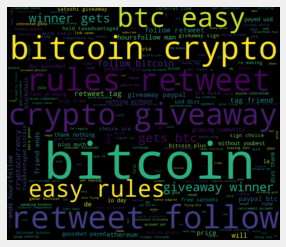

In [32]:
from wordcloud import WordCloud
#Plot the word cloud
allwords=''.join([twits for twits in tweets['text']])
wordCloud=WordCloud(width=700,height=600,random_state=21,max_font_size=129).generate(allwords)

plt.imshow(wordCloud,interpolation='bilinear')
plt.axis('off')
plt.show()


In [35]:
# Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return "Negative"
  elif score==0:
    return "Neutral"
  else:
    return 'Positive'
tweets['Analysis']=tweets['polarity'].apply(getAnalysis)
# Show the dataframe
tweets.iloc[:,2:]

,text,subjectivity,polarity,Analysis
0,io day on goosebet payed usd in divs💵thank y...,0.600,0.200000,Positive
1,io day on goosebet payed usd in divs💵thank y...,0.600,0.200000,Positive
2,giveaway bitcoinretweet follow x tag frie...,0.000,0.000000,Neutral
3,former phillies pitcher tyson brummett killed ...,0.000,-0.100000,Negative
4,if you consider yourself a bitcoiner but do n...,1.000,-0.300000,Negative
...,...,...,...,...
499,earn btc with bitkong and get interest on all...,0.750,0.100000,Positive
500,bitcoin solves this,0.000,0.000000,Neutral
501,only hours left to go tick tock at hrs cest t...,0.375,0.015625,Positive
502,🚨💰bitcoin crypto giveaway💰🚨🎁winner gets in b...,0.000,0.000000,Neutral


In [37]:
#Print all of the positive tweets
j=1
sorttwt=tweets.sort_values(by=['polarity'])
for i in range(0,sorttwt.shape[0]):
  if(sorttwt['Analysis'][i]=='Positive'):
    print(str(j)+')'+sorttwt['text'][i])
    print()
    j=j+1

1)io day  on goosebet payed  usd in divs💵thank you all we would be nothing without youbest fast growing community…

2)io day  on goosebet payed  usd in divs💵thank you all we would be nothing without youbest fast growing community…

3)will pop figures be the new bitcoin

4)bitcoin haha money from korea haha coronavirus

5)bitcoin the beauty of mathematics  via  i believe this need more attention

6) bitcoin is the only property you can truly own

7) join this free satoshi giveaway 🔥🔥🔥sign up for a choice ira to hold taxadvantaged bitcoin plus much more in your retir…

8)io day  on goosebet payed  usd in divs💵thank you all we would be nothing without youbest fast growing community…

9) they’re not making more land and they’re not making more bitcoin

10) bitcoin is the only property you can truly own

11)very nice  i love decentralize system blockchain decentralize

12) join this free satoshi giveaway 🔥🔥🔥sign up for a choice ira to hold taxadvantaged bitcoin plus much more in your retir…

In [40]:
#Print all of the Negative tweets(Most negative to less negative)
j=1
sorttwt=tweets.sort_values(by=['polarity'],ascending='False')
for i in range(0,sorttwt.shape[0]):
  if(sorttwt['Analysis'][i]=='Negative'):
    print(str(j)+')'+sorttwt['text'][i])
    print()
    j=j+1

1)former phillies pitcher tyson brummett killed in plane crash foxnews  news  noticias  bitcoin  cryptocurrency… 

2) if you consider yourself a bitcoiner but do not own bitcoin in your retirement account yet you are leaving sats on the tabl…

3) giveaway💴   cro to random followers that👍 like♻️ retweet🗣 comment cro👫 tag up to  friendsbitcoin ethere…

4) if you consider yourself a bitcoiner but do not own bitcoin in your retirement account yet you are leaving sats on the tabl…

5) bitcoin satoshi crypto blockchain airdropnew airdrop bitcoin black 📢top  referrals receive  bcb c…

6)daria what we do here is bitcoin mining and binary option trade we manage account and trade for clients with our remote control…

7)building blockchains secretly in south america   xbt btc bitcoin

8) if you consider yourself a bitcoiner but do not own bitcoin in your retirement account yet you are leaving sats on the tabl…

9)iso bitcoin will not go down kcoming

10) bored with bitcoin this btc price level is

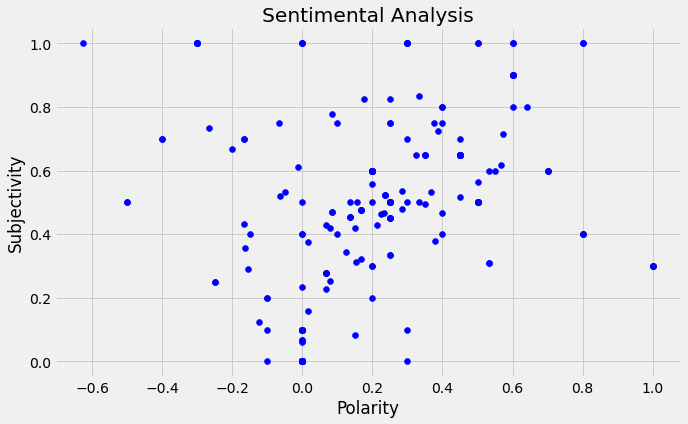

In [42]:
#Plot the subjectivity and polarity
plt.figure(figsize=(10,6))
for i in range(0,tweets.shape[0]):
  plt.scatter(tweets['polarity'][i],tweets['subjectivity'][i],color='Blue')

plt.title('Sentimental Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()


In [49]:
# Get the percentage(%) of positive and negative tweets
ptweets=tweets[tweets.Analysis=='Positive']
ptweets=ptweets['text']
#ptweets.head
round((ptweets.shape[0]/tweets.shape[0])*100,1)

29.2

In [50]:
ptweets=tweets[tweets.Analysis=='Neutral']
ptweets=ptweets['text']
ptweets.head(20)
round((ptweets.shape[0]/tweets.shape[0])*100,1)

64.9

In [48]:
ptweets=tweets[tweets.Analysis=='Negative']
ptweets=ptweets['text']
ptweets.head(20)
round((ptweets.shape[0]/tweets.shape[0])*100,1)

6.0

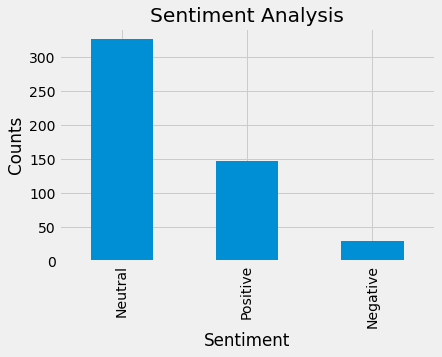

In [51]:
#Show the value counts
tweets['Analysis'].value_counts()
#Plot  and visualise the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis'].value_counts().plot(kind='bar')
plt.show()